<a href="https://colab.research.google.com/github/kiiriis/CE063_ML/blob/main/Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4_0

In [ ]:
# Import Numpy & PyTorch
import numpy as np
import torch

# Input (temp, rainfall, humidity)
input = np.array([[73, 67, 43],
[91, 88, 64],
[87, 134, 58],
[102, 43, 37],
[69, 96, 70]], dtype='float32')

target = np.array([[56],
[81],
[119],
[22],
[103]], dtype='float32')

# generate model

initial_target=np.array([[100],
[100],
[80],
[90],
[100]], dtype='float32') # taking random values

weight = np.array([[10],
[20],
[15],
[11],
[30]], dtype='float32')

bias = np.array([[7],[7],[7],[7],[7]],dtype='float32')

# Generate predictions

prediction = (initial_target*weight) + bias

  # print(prediction)

# MSE loss
  # from sklearn.metrics import mean_squared_error
  # x=mean_squared_error(target,prediction)
  # print(x)

# import numpy as np
# MSE = np.square(np.subtract(target,prediction)).mean()
# print(MSE)

In [ ]:
# Compute Gradients
import torch
from torch.utils.data import TensorDataset,DataLoader


inputs = torch.from_numpy(input)
targets = torch.from_numpy(target)

  # print(inputs)
  # print(targets)
dataset = TensorDataset(inputs,targets)
  # print(dataset[:5])
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Adjust weights and biases using gradient descent
weights= torch.randn(1,3, requires_grad=True)
biass = torch.randn(1, requires_grad=True)

print(weights)
print(biass)

def model(X):
  return X @ weights.t() + biass  # '@' - for matrix multiplication

for x,y in train_loader:
    preds = model(x)
    print("Prediction is :\n",preds)
    print("\nActual targets is :\n",y)
    break

# Calculate the loss
def mse_loss(predictions, targets):
  difference = predictions - targets
  return torch.sum(difference * difference)/ difference.numel() # numel() method returns the number of elements in the tensor.

for x,y in train_loader:
  preds=model(x)
  print("Prediction is :\n", preds)
  print("\nActual targets is :\n",y)
  print("\nLoss is: ",mse_loss(preds,y))
  break

epochs = 1000
for i in range(epochs):
    # Iterate through training dataloader
    for x,y in train_loader:
        # Generate Prediction
        preds = model(x)

        # Get the loss and perform backpropagation
        loss = mse_loss(preds, y)
        loss.backward()

        # Let's update the weights
        with torch.no_grad():
            weights -= weights.grad *1e-5
            biass -= biass.grad * 1e-5
            # Set the gradients to zero
            weights.grad.zero_()
            biass.grad.zero_()
    #print(f"Epoch {i}/{epochs}: Loss: {loss}")

for x,y in train_loader:
  preds= model(x)
  print("\nFinal Prediction is :\n",preds)
  print("\nActual targets are :\n",y)
  break

tensor([[-0.1999,  0.1494, -0.7254]], requires_grad=True)
tensor([-0.7655], requires_grad=True)
Prediction is :
 tensor([[-52.2376],
        [-50.9978],
        [-40.2140],
        [-36.5425]], grad_fn=<AddBackward0>)

Actual targets is :
 tensor([[ 81.],
        [103.],
        [119.],
        [ 56.]])
Prediction is :
 tensor([[-41.5715],
        [-36.5425],
        [-40.2140],
        [-52.2376]], grad_fn=<AddBackward0>)

Actual targets is :
 tensor([[ 22.],
        [ 56.],
        [119.],
        [ 81.]])

Loss is:  tensor(13926.7061, grad_fn=<DivBackward0>)

Final Prediction is :
 tensor([[118.5108],
        [ 20.9682],
        [101.2231],
        [ 56.7800]], grad_fn=<AddBackward0>)

Actual targets are :
 tensor([[119.],
        [ 22.],
        [103.],
        [ 56.]])


In [ ]:
print(weights)
print(biass)

tensor([[-0.3903,  0.8523,  0.6728]], requires_grad=True)
tensor([-0.7583], requires_grad=True)


In [ ]:
# 5. Use the model to predict crop yield for apples if temperature is 70, Rain is 34 and Humidity is 45.
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(inputs, targets)

# for x,y in dataset:
#   print(x,y)

test_input = np.array([[70, 34, 45]])

y_pred = model.predict(test_input)
print("Prediction: ", y_pred)


Prediction:  [[31.47395247]]


In [ ]:
# 1. Estimate the value of model parameters(weights and bias) and MSE Loss after training for 1000 epochs.
import numpy as np
MSE = mse_loss(preds,y)
print("MSE: ",MSE)

print("Weights: ",weights)
print("Bias: ",biass)

MSE:  tensor(1.2674, grad_fn=<DivBackward0>)
Weights:  tensor([[-0.3903,  0.8523,  0.6728]], requires_grad=True)
Bias:  tensor([-0.7583], requires_grad=True)


In [ ]:
# 2. Take the learning rate value as 0.1 and train the model. Write in brief the impact of this learning rate on the model.
# Compute Gradients
# Import Numpy & PyTorch
import numpy as np
import torch

# Input (temp, rainfall, humidity)
input = np.array([[73, 67, 43],
[91, 88, 64],
[87, 134, 58],
[102, 43, 37],
[69, 96, 70]], dtype='float32')

target = np.array([[56],
[81],
[119],
[22],
[103]], dtype='float32')

# generate model

initial_target=np.array([[100],
[100],
[80],
[90],
[100]], dtype='float32') # taking random values

weight = np.array([[10],
[20],
[15],
[11],
[30]], dtype='float32')

bias = np.array([[7],[7],[7],[7],[7]],dtype='float32')

# Generate predictions

prediction = (initial_target*weight) + bias

  # print(prediction)

# MSE loss
  # from sklearn.metrics import mean_squared_error
  # x=mean_squared_error(target,prediction)
  # print(x)

# import numpy as np
# MSE = np.square(np.subtract(target,prediction)).mean()
# print(MSE)

import torch
from torch.utils.data import TensorDataset,DataLoader


inputs = torch.from_numpy(input)
targets = torch.from_numpy(target)

  # print(inputs)
  # print(targets)
dataset = TensorDataset(inputs,targets)
  # print(dataset[:5])
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Adjust weights and biases using gradient descent
weights= torch.randn(1,3, requires_grad=True)
biass = torch.randn(1, requires_grad=True)

print(weights)
print(biass)

def model(X):
  return X @ weights.t() + biass  # '@' - for matrix multiplication

for x,y in train_loader:
    preds = model(x)
    print("Prediction is :\n",preds)
    print("\nActual targets is :\n",y)
    break

# Calculate the loss
def mse_loss(predictions, targets):
  difference = predictions - targets
  return torch.sum(difference * difference)/ difference.numel() # numel() method returns the number of elements in the tensor.

for x,y in train_loader:
  preds=model(x)
  print("Prediction is :\n", preds)
  print("\nActual targets is :\n",y)
  print("\nLoss is: ",mse_loss(preds,y))
  break

epochs = 1000
for i in range(epochs):
    # Iterate through training dataloader
    for x,y in train_loader:
        # Generate Prediction
        preds = model(x)

        # Get the loss and perform backpropagation
        loss = mse_loss(preds, y)
        loss.backward()

        # Let's update the weights
        with torch.no_grad():
            weights -= weights.grad *0.1
            biass -= biass.grad * 0.1
            # Set the gradients to zero
            weights.grad.zero_()
            biass.grad.zero_()
    #print(f"Epoch {i}/{epochs}: Loss: {loss}")

for x,y in train_loader:
  preds= model(x)
  print("\nFinal Prediction is :\n",preds)
  print("\nActual targets are :\n",y)
  break

tensor([[-0.1537,  0.0148,  3.0292]], requires_grad=True)
tensor([0.4066], requires_grad=True)
Prediction is :
 tensor([[164.7096],
        [120.4337],
        [203.2660],
        [181.5914]], grad_fn=<AddBackward0>)

Actual targets is :
 tensor([[119.],
        [ 56.],
        [103.],
        [ 81.]])
Prediction is :
 tensor([[164.7096],
        [203.2660],
        [ 97.4471],
        [181.5914]], grad_fn=<AddBackward0>)

Actual targets is :
 tensor([[119.],
        [103.],
        [ 22.],
        [ 81.]])

Loss is:  tensor(6988.3843, grad_fn=<DivBackward0>)

Final Prediction is :
 tensor([[nan],
        [nan],
        [nan],
        [nan]], grad_fn=<AddBackward0>)

Actual targets are :
 tensor([[119.],
        [ 81.],
        [ 22.],
        [103.]])


In [ ]:
import numpy as np
MSE = mse_loss(preds,y)
print("MSE: ",MSE)

print("Weights: ",weights)
print("Bias: ",biass)

RuntimeError: ignored

In [ ]:
# 3. Take the learning rate value as 0.0000001 and train the model. Write in brief the impact of this learning rate on the model.
# Compute Gradients
# Import Numpy & PyTorch
import numpy as np
import torch

# Input (temp, rainfall, humidity)
input = np.array([[73, 67, 43],
[91, 88, 64],
[87, 134, 58],
[102, 43, 37],
[69, 96, 70]], dtype='float32')

target = np.array([[56],
[81],
[119],
[22],
[103]], dtype='float32')

# generate model

initial_target=np.array([[100],
[100],
[80],
[90],
[100]], dtype='float32') # taking random values

weight = np.array([[10],
[20],
[15],
[11],
[30]], dtype='float32')

bias = np.array([[7],[7],[7],[7],[7]],dtype='float32')

# Generate predictions

prediction = (initial_target*weight) + bias
loss_arr=[];
  # print(prediction)

# MSE loss
  # from sklearn.metrics import mean_squared_error
  # x=mean_squared_error(target,prediction)
  # print(x)

# import numpy as np
# MSE = np.square(np.subtract(target,prediction)).mean()
# print(MSE)

import torch
from torch.utils.data import TensorDataset,DataLoader


inputs = torch.from_numpy(input)
targets = torch.from_numpy(target)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(inputs, targets, random_state=97)

  # print(inputs)
  # print(targets)
dataset = TensorDataset(inputs,targets)
  # print(dataset[:5])
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

# Adjust weights and biases using gradient descent
weights= torch.randn(1,3, requires_grad=True)
biass = torch.randn(1, requires_grad=True)

print(weights)
print(biass)

def model(X):
  return X @ weights.t() + biass  # '@' - for matrix multiplication

for x,y in train_loader:
    preds = model(x)
    print("Prediction is :\n",preds)
    print("\nActual targets is :\n",y)
    break

# Calculate the loss
def mse_loss(predictions, targets):
  difference = predictions - targets
  return torch.sum(difference * difference)/ difference.numel() # numel() method returns the number of elements in the tensor.

for x,y in train_loader:
  preds=model(x)
  print("Prediction is :\n", preds)
  print("\nActual targets is :\n",y)
  print("\nLoss is: ",mse_loss(preds,y))
  break



epochs = 1000
for i in range(epochs):
    # Iterate through training dataloader
    for x,y in train_loader:
        # Generate Prediction
        preds = model(x)

        # Get the loss and perform backpropagation
        
        loss = mse_loss(preds, y)
        loss_arr+=loss
        # np.append(loss_arr,loss,axis=0)
        loss.backward()

        # Let's update the weights
        with torch.no_grad():
            weights -= weights.grad *1e-7
            biass -= biass.grad * 1e-7
            # Set the gradients to zero
            weights.grad.zero_()
            biass.grad.zero_()
    #print(f"Epoch {i}/{epochs}: Loss: {loss}")

for x,y in train_loader:
  preds= model(x)
  print("\nFinal Prediction is :\n",preds)
  print("\nActual targets are :\n",y)
  break

tensor([[-1.8869,  2.1758,  0.7298]], requires_grad=True)
tensor([-0.4235], requires_grad=True)
Prediction is :
 tensor([[169.3093],
        [-72.3196],
        [ 38.9979],
        [129.3491]], grad_fn=<AddBackward0>)

Actual targets is :
 tensor([[119.],
        [ 22.],
        [ 56.],
        [103.]])
Prediction is :
 tensor([[ 38.9979],
        [-72.3196],
        [169.3093],
        [ 66.0527]], grad_fn=<AddBackward0>)

Actual targets is :
 tensor([[ 56.],
        [ 22.],
        [119.],
        [ 81.]])

Loss is:  tensor(2984.9272, grad_fn=<DivBackward0>)


TypeError: ignored

In [ ]:
print(loss_arr)

[]


In [ ]:
import numpy as np
MSE = mse_loss(preds,y)
print("MSE: ",MSE)

print("Weights: ",weights)
print("Bias: ",biass)

MSE:  tensor(2525.7390, grad_fn=<DivBackward0>)
Weights:  tensor([[-1.8869,  2.1758,  0.7298]], requires_grad=True)
Bias:  tensor([-0.4235], requires_grad=True)


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

history = model.fit(X_train, y_train)
print(history)
# loss_train = history['train_loss']
# epochs = range(1,1000)
# plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.title('Training loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

LinearRegression()


# Lab 4_1

In [ ]:
# Import Numpy & PyTorch
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn

input = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37],[69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69,96, 70],
                   [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96,70]], dtype='float32')
# Targets (apples, oranges)
target = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
[56, 70], [81, 101], [119, 133], [22, 37], [103, 119]],dtype='float32')

inputs = torch.from_numpy(input)
targets = torch.from_numpy(target)

# Define dataset
train_ds = TensorDataset(inputs,targets)

# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
next(iter(train_dl))

# Define model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.5189,  0.1947, -0.2904],
        [-0.0798, -0.3647,  0.0358]], requires_grad=True)
Parameter containing:
tensor([-0.2055, -0.2495], requires_grad=True)


In [ ]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
# Define loss function
import torch.nn.functional as F

loss_fn = F.mse_loss
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(16765.0957, grad_fn=<MseLossBackward0>)


In [ ]:
# Define a utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    for epoch in range(num_epochs):
        for xb,yb in train_dl:
            # Generate predictions
            pred = model(xb)
            loss = loss_fn(pred, yb)
            # Perform gradient descent
            loss.backward()
            opt.step()
            opt.zero_grad()
    print('Training loss: ', loss_fn(model(inputs), targets))

# Train the model for 100 epochs
fit(100, model, loss_fn, opt)

Training loss:  tensor(23.7071, grad_fn=<MseLossBackward0>)


In [ ]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 58.0238,  71.6338],
        [ 79.4021,  99.3211],
        [123.8609, 133.6501],
        [ 25.7914,  44.9240],
        [ 94.2406, 112.1449],
        [ 58.0238,  71.6338],
        [ 79.4021,  99.3211],
        [123.8609, 133.6501],
        [ 25.7914,  44.9240],
        [ 94.2406, 112.1449],
        [ 58.0238,  71.6338],
        [ 79.4021,  99.3211],
        [123.8609, 133.6501],
        [ 25.7914,  44.9240],
        [ 94.2406, 112.1449]], grad_fn=<AddmmBackward0>)

In [ ]:
# Compare with targets
targets

print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [ ]:
fit(100, model, loss_fn, opt)

Training loss:  tensor(9.4001, grad_fn=<MseLossBackward0>)


## Exercise 1:
Try Linear Regression just using numpy (Without Tensorflow/Pytorch or other torch library). You can optionally use sklearn (if you want).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
class LinearRegression():
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def fit(self, X, y):
        mean_x = np.mean(X)
        mean_y = np.mean(y)
        
        SSxy = np.sum(np.multiply(X, y)) - len(x) * mean_x * mean_y
        SSxx = np.sum(np.multiply(X, x)) - len(x) * mean_x * mean_x
        
        self.b1 = SSxy / SSxx
        self.b0 = mean_y - self.b1 * mean_x
    
    def predict(self, input_data):
        return self.b0 + self.b1 * input_data

In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
y = np.array([6, 6, 11, 17, 16, 20, 23, 23, 29, 33, 39])

model = LinearRegression()
model.fit(x, y)

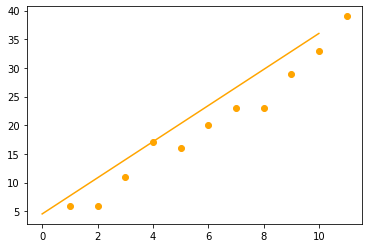

In [ ]:
predictions = model.predict(x)
plt.scatter(x = x, y = y, color='orange')
plt.plot(predictions, color='orange')
plt.show()

## Exercise 2
Try Linear regression on same prediction data using Tensorflow.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


np.random.seed(101)
tf.random.set_seed(101)

In [ ]:
# Generating random linear data
# There will be 50 data points ranging from 0 to 50

# x = np.linspace(0, 50, 50)
# y = np.linspace(0, 50, 50)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
y = np.array([6, 6, 11, 17, 16, 20, 23, 23, 29, 33, 39])
 
# Adding noise to the random linear data
# x += np.random.uniform(-4, 4, 50)
# y += np.random.uniform(-4, 4, 50)
 
n = len(x) # Number of data points

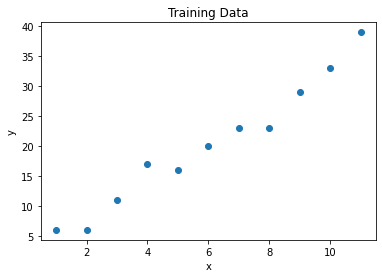

In [ ]:
# Plot of Training Data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [ ]:
pip uninstall tensorflow-gpu tensorflow tensorflow-base

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.8/dist-packages/tensorflow-2.11.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.11.0


In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.4 MB/s eta 0:00:00


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

X = tf.compat.v1.placeholder("float")
Y = tf.compat.v1.placeholder("float")

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

learning_rate = 0.01
training_epochs = 1000

# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)
 
# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)
 
# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
# Global Variables Initializer
init = tf.global_variables_initializer()

In [ ]:
# Starting the Tensorflow Session
with tf.Session() as sess:
     
    # Initializing the Variables
    sess.run(init)
     
    # Iterating through all the epochs
    for epoch in range(training_epochs):
         
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})
         
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 1.7700539 W = 3.2434921 b = 0.76008624
Epoch 100 : cost = 1.7633674 W = 3.2370675 b = 0.8118001
Epoch 150 : cost = 1.7578653 W = 3.2312994 b = 0.8582286
Epoch 200 : cost = 1.7533263 W = 3.2261207 b = 0.89991146
Epoch 250 : cost = 1.749575 W = 3.2214713 b = 0.9373347
Epoch 300 : cost = 1.7464694 W = 3.2172968 b = 0.9709321
Epoch 350 : cost = 1.7438917 W = 3.2135494 b = 1.0010957
Epoch 400 : cost = 1.7417483 W = 3.2101853 b = 1.028176
Epoch 450 : cost = 1.7399601 W = 3.2071643 b = 1.0524899
Epoch 500 : cost = 1.7384661 W = 3.2044525 b = 1.0743172
Epoch 550 : cost = 1.7372134 W = 3.202018 b = 1.0939153
Epoch 600 : cost = 1.7361597 W = 3.199832 b = 1.1115103
Epoch 650 : cost = 1.7352709 W = 3.1978693 b = 1.127305
Epoch 700 : cost = 1.7345207 W = 3.1961074 b = 1.1414874
Epoch 750 : cost = 1.733884 W = 3.194526 b = 1.1542196
Epoch 800 : cost = 1.7333448 W = 3.1931057 b = 1.1656507
Epoch 850 : cost = 1.7328814 W = 3.1918304 b = 1.1759132
Epoch 900 : cost = 1.732488 W = 3.190

In [ ]:
# Calculating the predictions
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

Training cost = 1.7318579 Weight = 3.1887352 bias = 1.2008244 



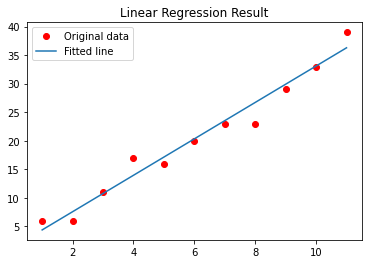

In [ ]:
# Plotting the Results
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()